# Fundamentos de Inteligência Artificial
## Projeto II
### Marcello Fabrizio

In [428]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, fbeta_score

import warnings
warnings.filterwarnings('ignore')

Este projeto tem como objetivo realizar a comparação dos algoritmos de classificação estudados, sendo eles Decision Tree, K-Nearest Neighbours e Naive Bayes. Esta comparação visa encontrar o algoritmo que nos permite obter a mais acurácia na classificação do dataset Pima Indians Diabetes, obtido online na plataforma Kaggle.

## Análise de dados

Afim de obtermos os melhores resultados sobre o conjunto de dados, é preciso conhecermos ao máximo nos aspectos dos dados sobre os quais estamos trabalhando.

### Pipeline OSEMN
- O - Obtaining / Obter os dados
- S - Scrubbing / Limpando os dados
- E - Exploring / Visualizar os dados nos permitirá encontrar padrões e tendências
- M - Modeling / Modelando os dados para obter as predições
- N - INterpreting / Interpretar os resultados

In [429]:
# Leitura do CSV
diabetes = pd.read_csv("./diabetes.csv")
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
diabetes.head()

labels = ['Não Diabético', 'Diabético']

In [430]:
# Imprime informações sobre as colunas, tipos de dados, valores NaN e memória ocupada
diabetes.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [431]:
# Imprime detalhes estatísticos básicos sobre os dados
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Como é possível ver com o método `describe()`, as colunas possuem seus valores máximos muito maiores que o seu desvio padrão e média, indicando a possibilidade da existência de outliers no conjunto. 

Pregnancies                     AxesSubplot(0.125,0.71587;0.168478x0.16413)
Glucose                      AxesSubplot(0.327174,0.71587;0.168478x0.16413)
BloodPressure                AxesSubplot(0.529348,0.71587;0.168478x0.16413)
SkinThickness                AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Insulin                        AxesSubplot(0.125,0.518913;0.168478x0.16413)
BMI                         AxesSubplot(0.327174,0.518913;0.168478x0.16413)
DiabetesPedigreeFunction    AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Age                         AxesSubplot(0.731522,0.518913;0.168478x0.16413)
dtype: object

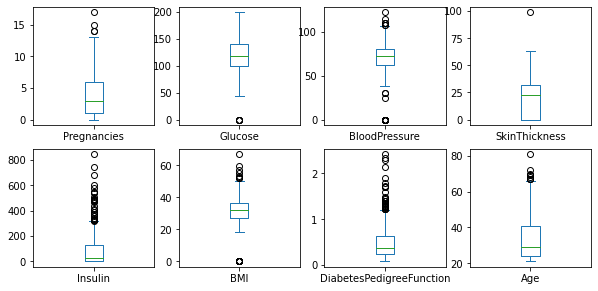

In [432]:
diabetes.drop(["Outcome"], axis=1).plot(kind="box", subplots=True, layout=(4,4), figsize=(10,10))

In [433]:
# Substituição dos valores zerados por NaN

diabetes_copy = diabetes.copy(deep = True)
diabetes_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

print(diabetes_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [434]:
# Limpando os dados dos valores NaN
diabetes_copy['Glucose'].fillna(diabetes_copy['Glucose'].mean(), inplace = True)
diabetes_copy['BloodPressure'].fillna(diabetes_copy['BloodPressure'].mean(), inplace = True)
diabetes_copy['SkinThickness'].fillna(diabetes_copy['SkinThickness'].median(), inplace = True)
diabetes_copy['Insulin'].fillna(diabetes_copy['Insulin'].median(), inplace = True)
diabetes_copy['BMI'].fillna(diabetes_copy['BMI'].median(), inplace = True)

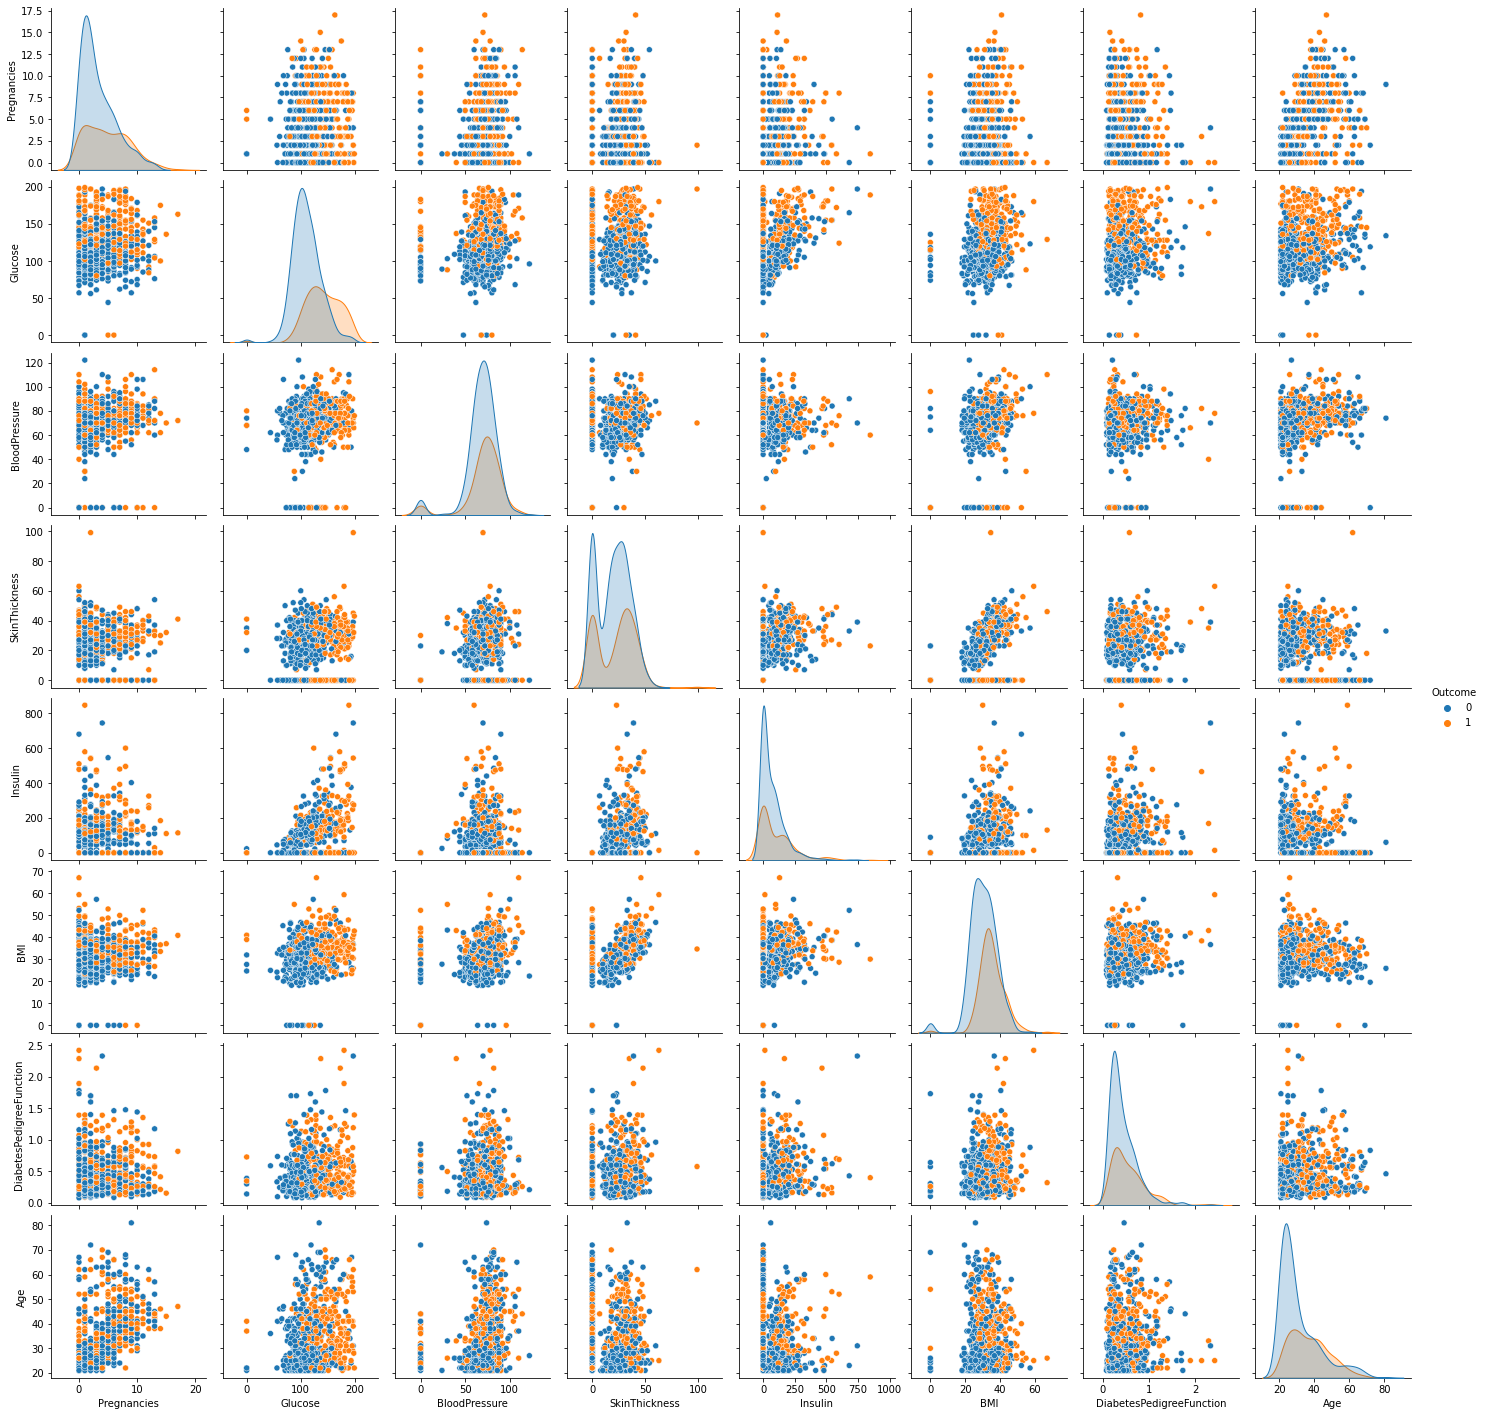

In [435]:
# Pairplot dos dados

sb.pairplot(diabetes, hue = 'Outcome')

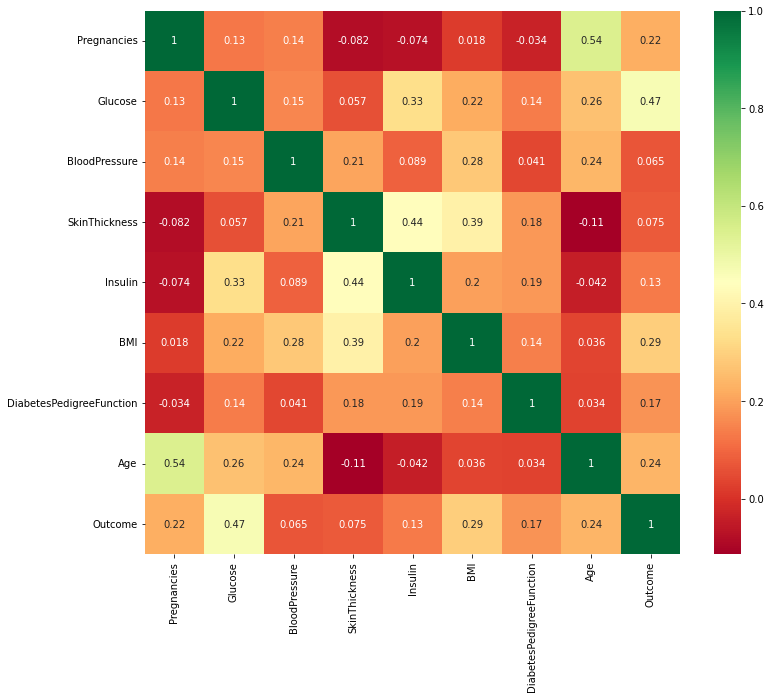

In [436]:
# Mapa de calor dos dados limpos

plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sb.heatmap(diabetes.corr(), annot=True,cmap ='RdYlGn')

In [437]:
# Normalizando os dados. A normalização será útil para o algoritmo KNN. 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X = pd.DataFrame(sc.fit_transform(diabetes.drop(['Outcome'], axis=1)), columns=columns)
print(X)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1      -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2       1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3      -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4      -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   
..           ...       ...            ...            ...       ...       ...   
763     1.827813 -0.622642       0.356432       1.722735  0.870031  0.115169   
764    -0.547919  0.034598       0.046245       0.405445 -0.692891  0.610154   
765     0.342981  0.003301       0.149641       0.154533  0.279594 -0.735190   
766    -0.844885  0.159787      -0.470732      -1.288212 -0.692891 -0.240205   
767    -0.844885 -0.873019       0.046245       0.656358 -0.692891 -0.202129   

     DiabetesPedigreeFunction       Age

In [438]:
y = diabetes.Outcome
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Text(0.5, 1.0, 'Diagnóstico')

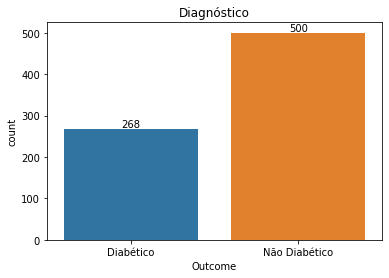

In [439]:
X = diabetes.iloc[:, :-1]
y = diabetes.iloc[:, -1:]

plt.figure()
ax = sb.countplot(
    x = 'Outcome',
    data = y.replace({
        'Outcome': {
            0: 'Não Diabético',
            1: 'Diabético' 
        }
    })
)
ax.bar_label(ax.containers[0])
ax.set_title('Diagnóstico')

Como podemos ver, existe um desbalanceamento nas classes presentes no dataset, portanto, será necessário realizar o balanceamento dos dados. Será utilizado o método de Undersampling Clustering, e para Oversampling, SMOTE

### Balanciamento com Clustering Centroids

Text(0.5, 1.0, 'Diagnóstico - Balanceamento com Clustering Centroids')

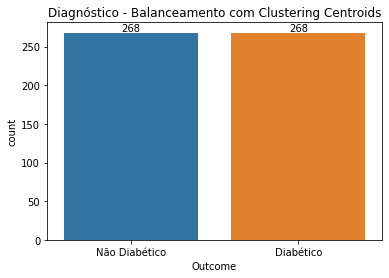

In [662]:
# Balaceamento dos dados com Clustering centroids
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(random_state=42)
X_cc, y_cc = cc.fit_resample(X, y)

plt.figure()
ax = sb.countplot(
    x = 'Outcome',
    data = y_cc.replace({
        'Outcome': {
            0: 'Não Diabético',
            1: 'Diabético' 
        }
    })
)
ax.bar_label(ax.containers[0])
ax.set_title('Diagnóstico - Balanceamento com Clustering Centroids')

### Balanceamento com SMOTE

Text(0.5, 1.0, 'Diagnóstico - Balanceamento com SMOTE')

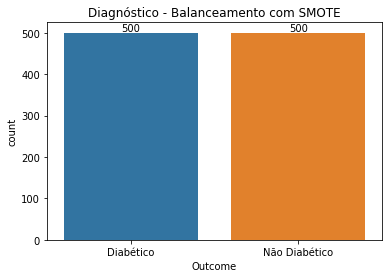

In [661]:
# Balaceamento dos dados com SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

plt.figure()
ax = sb.countplot(
    x = 'Outcome',
    data = y_smote.replace({
        'Outcome': {
            0: 'Não Diabético',
            1: 'Diabético' 
        }
    })
)
ax.bar_label(ax.containers[0])
ax.set_title('Diagnóstico - Balanceamento com SMOTE')

## Criando as funções de utilidade

In [442]:
def print_confusion_matrix(y, predictions, xlabel, ylabel=None, color=None):
    if ylabel == None:
        ylabel = xlabel
    
    cf = confusion_matrix(y, predictions)
    sb.heatmap(cf,annot=True,cmap=color, fmt="d",xticklabels=xlabel,yticklabels=ylabel)   

In [443]:
def print_roc_curve(model, X, y, label, title):
    y_pred_proba = model.predict_proba(X)[:,1]
    fpr, tpr, thresholds = roc_curve(y, y_pred_proba)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr, label=label)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(title)
    plt.show()
    
    # Área sob a curva
    auc = roc_auc_score(y,y_pred_proba)
    print(f'Área sob a curva: {auc}')

In [444]:
def set_classification_report(results, y, predictions, balancing_type):
    results['Acurácia'][balancing_type] = accuracy_score(y,predictions)
    results['Recall'][balancing_type] = recall_score(y,predictions)
    results['Precisão'][balancing_type] = precision_score(y,predictions)
    results['F-Measure'][balancing_type] = f1_score(y,predictions)

## Decision Tree
Depois de termos feito a exploração e a preparação dos dados, iremos realizar o primeiro teste de classificação utilizando o algoritmo Decision Tree, com os dados balanceados por SMOTE e Clustering e sem balanceamento

In [445]:
# Dataset para armazenar os resultados

x_results = ['Balanceamento', 'Acurácia', 'Recall', 'Precisão', 'F-Measure']
y_results = ['Original', 'SMOTE', 'ClusterCentroids']

results_dt = pd.DataFrame(columns=x_results)

results_dt.reindex()
results_dt['Balanceamento'] = y_results

### Decision Tree sem Balanceamento

In [446]:
# Comparar diferentes conjuntos de hiperparâmetros no treinamento
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [2,3,4,5,6,7,8],
    'min_samples_leaf': [1,2,3,4,5,6,7,8]
}

In [447]:
dt = DecisionTreeClassifier()
grid = GridSearchCV(dt, params, cv=10)
grid.fit(X, y)

print(f'Melhores Parâmetros Para os Dados Originais: {grid.best_params_}')

Melhores Parâmetros Para os Dados Originais: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 8}


Como nos é dado pelos resultados do GridSearch, temos que o melhor critério para a avaliação é a entropia e a profundida máxima de oito.

In [448]:
predictions = cross_val_predict(grid.best_estimator_, X,y, cv=10)
print(f'Acurácia de {accuracy_score(y, predictions)*100}%')

Acurácia de 74.21875%


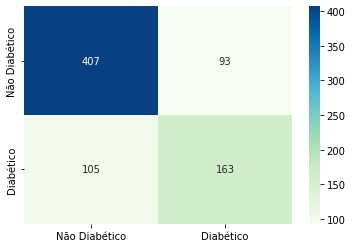

In [449]:
print_confusion_matrix(y, predictions=predictions, xlabel=labels, color='GnBu')

A curva ROC (Receiver Operating Characteristic) irá nos permitir visualizar o quão "bom" é nosso modelo em predizer se uma pessoa possui diabetes ou não. Aqui, se utiliza o melhor modelo obtido pela busca em grade e se utiliza para construir uma curva ROC.

(array([0.   , 0.006, 0.008, 0.02 , 0.038, 0.072, 0.08 , 0.086, 0.094,
       0.104, 0.116, 0.216, 0.23 , 0.284, 0.296, 0.314, 0.476, 0.5  ,
       0.53 , 0.608, 1.   ]), array([0.        , 0.19402985, 0.24626866, 0.33208955, 0.42537313,
       0.5858209 , 0.62313433, 0.64179104, 0.6641791 , 0.68283582,
       0.70149254, 0.82835821, 0.84328358, 0.89179104, 0.89925373,
       0.90671642, 0.96641791, 0.9738806 , 0.98134328, 1.        ,
       1.        ]), array([1.94545455, 0.94545455, 0.93333333, 0.79310345, 0.73529412,
       0.71666667, 0.71428571, 0.625     , 0.6       , 0.5       ,
       0.45454545, 0.4047619 , 0.36363636, 0.325     , 0.25      ,
       0.18181818, 0.16494845, 0.14285714, 0.11764706, 0.11363636,
       0.        ]))


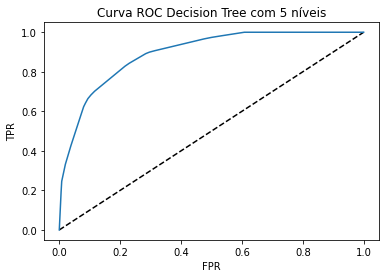

Área sob a curva: 0.893044776119403


In [450]:
print_roc_curve(grid, X, y, 'Decision Tree', 'Curva ROC Decision Tree com 5 níveis')

Armazenando os resultados

In [451]:
set_classification_report(results_dt,y,predictions,0)

### Decision Tree com Balanceamento por SMOTE

In [452]:
dt = DecisionTreeClassifier()
grid = GridSearchCV(dt, params, cv=10)
grid.fit(X_smote, y_smote)

print(f'Melhor modelo para Decision Tree com balanceamento por SMOTE: {grid.best_estimator_}')
print(f'Melhores parâmetros para Decision Tree com balanceamento por SMOTE: {grid.best_params_}')

Melhor modelo para Decision Tree com balanceamento por SMOTE: DecisionTreeClassifier(criterion='entropy', max_depth=8)
Melhores parâmetros para Decision Tree com balanceamento por SMOTE: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 1}


Como nos é dado pelos resultados do GridSearch, temos que o melhor critério para a avaliação é a entropia e a profundida máxima de 6.

In [453]:
predictions = cross_val_predict(grid.best_estimator_, X_smote,y_smote, cv=10)
print(f'Acurácia de {accuracy_score(y_smote, predictions)*100}%')

Acurácia de 78.60000000000001%


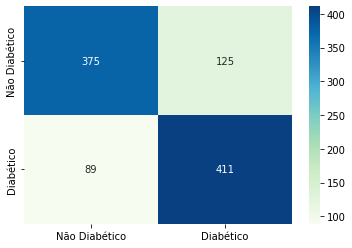

In [454]:
print_confusion_matrix(y_smote, predictions=predictions, xlabel=labels, color='GnBu')

(array([0.   , 0.   , 0.002, 0.006, 0.024, 0.048, 0.05 , 0.058, 0.07 ,
       0.084, 0.092, 0.12 , 0.134, 0.142, 0.194, 0.206, 0.246, 0.26 ,
       0.284, 1.   ]), array([0.   , 0.454, 0.502, 0.588, 0.712, 0.788, 0.794, 0.814, 0.838,
       0.864, 0.876, 0.916, 0.932, 0.938, 0.968, 0.974, 0.99 , 0.994,
       1.   , 1.   ]), array([2.        , 1.        , 0.96      , 0.95555556, 0.87323944,
       0.76      , 0.75      , 0.71428571, 0.66666667, 0.65      ,
       0.6       , 0.58823529, 0.53333333, 0.42857143, 0.36585366,
       0.33333333, 0.28571429, 0.22222222, 0.2       , 0.        ]))


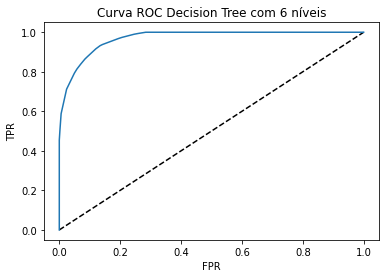

Área sob a curva: 0.969444


In [455]:
print_roc_curve(grid, X_smote, y_smote, 'Decision Tree', 'Curva ROC Decision Tree com 6 níveis')

In [456]:
set_classification_report(results_dt,y_smote,predictions,1)


### Decision Tree com Balanceamento por Clustering Centroids

In [457]:
dt = DecisionTreeClassifier()
grid = GridSearchCV(dt, params, cv=10)
grid.fit(X_cc, y_cc)

print(f'Melhores Parâmetros Para os Dados Balanceados com CC: {grid.best_params_}')

Melhores Parâmetros Para os Dados Balanceados com CC: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 6}


Como nos é dado pelos resultados do GridSearch, temos que o melhor critério para a avaliação é a entropia e a profundida máxima de 5.

In [458]:
predictions = cross_val_predict(grid.best_estimator_, X_cc,y_cc, cv=10)
print(f'Acurácia de {accuracy_score(y_cc, predictions)*100}%')

Acurácia de 72.94776119402985%


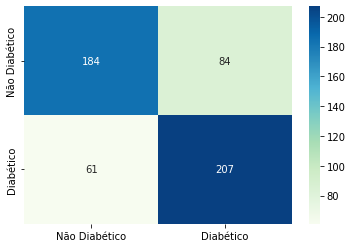

In [459]:
print_confusion_matrix(y_cc, predictions, xlabel=labels, color='GnBu')

(array([0.        , 0.        , 0.00746269, 0.01119403, 0.01492537,
       0.03358209, 0.10074627, 0.17164179, 0.17910448, 0.19029851,
       0.24626866, 0.26865672, 0.35820896, 0.37313433, 0.39179104,
       0.48507463, 0.51492537, 0.53358209, 0.58208955, 1.        ]), array([0.        , 0.09701493, 0.26492537, 0.29850746, 0.32462687,
       0.40671642, 0.59328358, 0.76865672, 0.78358209, 0.79850746,
       0.85447761, 0.87313433, 0.94029851, 0.94776119, 0.95522388,
       0.98134328, 0.98880597, 0.99253731, 1.        , 1.        ]), array([2.        , 1.        , 0.95744681, 0.9       , 0.875     ,
       0.81481481, 0.73529412, 0.71212121, 0.66666667, 0.57142857,
       0.5       , 0.45454545, 0.42857143, 0.33333333, 0.28571429,
       0.21875   , 0.2       , 0.16666667, 0.13333333, 0.        ]))


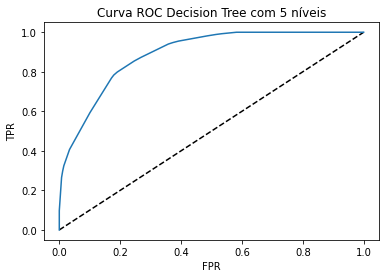

Área sob a curva: 0.8899810648251281


In [460]:
print_roc_curve(grid, X_cc, y_cc, 'Decision Tree', 'Curva ROC Decision Tree com 5 níveis')

Armazenando os Resultados

In [461]:
set_classification_report(results_dt, y_cc, predictions, 2)
results_dt.style.highlight_max().set_properties(**{'padding': '5px'})

,Balanceamento,Acurácia,Recall,Precisão,F-Measure
0,Original,0.742188,0.608209,0.636719,0.622137
1,SMOTE,0.786000,0.822000,0.766791,0.793436
2,ClusterCentroids,0.729478,0.772388,0.711340,0.740608


## K-Nearest Neighbour

In [595]:
from sklearn.neighbors import KNeighborsClassifier

In [596]:
# Dataset para armazenar os resultados

x_results = ['Balanceamento', 'Acurácia', 'Recall', 'Precisão', 'F-Measure']
y_results = ['Original', 'SMOTE', 'ClusterCentroids']

results_knn = pd.DataFrame(columns=x_results)

results_knn.reindex()
results_knn['Balanceamento'] = y_results

### KNN sem Balanceamento

In [597]:
params = {
    'n_neighbors': (3, 5, 7, 9, 11, 13, 15, 17),
    'weights': ('uniform', 'distance'),
    'metric': ('euclidean', 'manhattan')
}

knn = KNeighborsClassifier()
grid = GridSearchCV(knn, params, cv=10)
grid.fit(X,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ('euclidean', 'manhattan'),
                         'n_neighbors': (3, 5, 7, 9, 11, 13, 15, 17),
                         'weights': ('uniform', 'distance')})

In [598]:
knn = grid.best_estimator_

predictions = cross_val_predict(knn, X, y, cv=10)

print(f'Melhor modelo para KNN sem balanceamento: {grid.best_estimator_}')
print(f'Acurâcia obtida com o melhor modelo: {accuracy_score(y, predictions)*100}%')

Melhor modelo para KNN sem balanceamento: KNeighborsClassifier(metric='manhattan', n_neighbors=13)
Acurâcia obtida com o melhor modelo: 76.04166666666666%


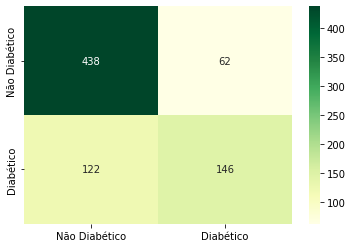

In [599]:
print_confusion_matrix(y, predictions, xlabel=labels, color='YlGn')

(array([0.   , 0.   , 0.002, 0.004, 0.018, 0.04 , 0.066, 0.112, 0.178,
       0.268, 0.354, 0.468, 0.624, 0.846, 1.   ]), array([0.        , 0.00373134, 0.04104478, 0.13432836, 0.24253731,
       0.3880597 , 0.4738806 , 0.5858209 , 0.68283582, 0.78358209,
       0.85447761, 0.92910448, 0.97014925, 1.        , 1.        ]), array([2.        , 1.        , 0.92307692, 0.84615385, 0.76923077,
       0.69230769, 0.61538462, 0.53846154, 0.46153846, 0.38461538,
       0.30769231, 0.23076923, 0.15384615, 0.07692308, 0.        ]))


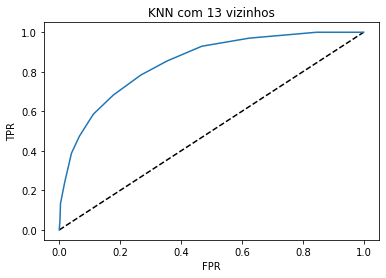

Área sob a curva: 0.8461567164179103


In [600]:
print_roc_curve(grid, X,y, 'KNN', 'KNN com 13 vizinhos')

In [601]:
set_classification_report(results_knn, y, predictions, 0)

### KNN com Balancemanto por SMOTE

In [602]:
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, params, cv=10)
grid.fit(X_smote,y_smote)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ('euclidean', 'manhattan'),
                         'n_neighbors': (3, 5, 7, 9, 11, 13, 15, 17),
                         'weights': ('uniform', 'distance')})

In [603]:
knn = grid.best_estimator_

predictions = cross_val_predict(knn, X_smote, y_smote, cv=10)

print(f'Melhor modelo para KNN com balanceamento por SMOTE: {grid.best_estimator_}')
print(f'Acurâcia obtida com o melhor modelo: {accuracy_score(y_smote, predictions)*100}%')

Melhor modelo para KNN com balanceamento por SMOTE: KNeighborsClassifier(metric='manhattan', weights='distance')
Acurâcia obtida com o melhor modelo: 79.80000000000001%


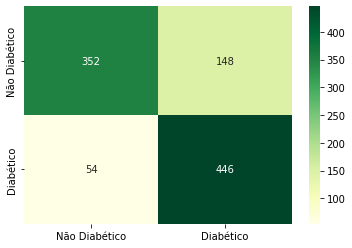

In [604]:
print_confusion_matrix(y_smote, predictions, xlabel=labels, color='YlGn')

(array([0., 0., 1.]), array([0., 1., 1.]), array([2., 1., 0.]))


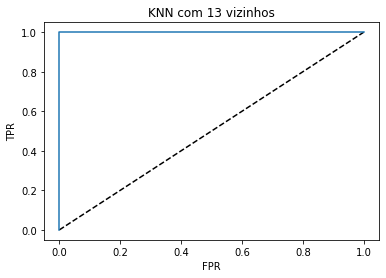

Área sob a curva: 1.0


In [605]:
print_roc_curve(grid,X_smote,y_smote,'KNN', 'KNN com 13 vizinhos')

In [606]:
set_classification_report(results_knn, y_smote, predictions, 1)

### KNN com Balanceamento por Clustering Centroids

In [607]:
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, params, cv=10)
grid.fit(X_cc,y_cc)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ('euclidean', 'manhattan'),
                         'n_neighbors': (3, 5, 7, 9, 11, 13, 15, 17),
                         'weights': ('uniform', 'distance')})

In [608]:
knn = grid.best_estimator_

predictions = cross_val_predict(knn, X_cc, y_cc, cv=10)

print(f'Melhor modelo para KNN com balanceamento por CC: {grid.best_estimator_}')
print(f'Acurâcia obtida com o melhor modelo: {accuracy_score(y_cc, predictions)*100}%')

Melhor modelo para KNN com balanceamento por CC: KNeighborsClassifier(metric='manhattan', n_neighbors=13)
Acurâcia obtida com o melhor modelo: 72.38805970149254%


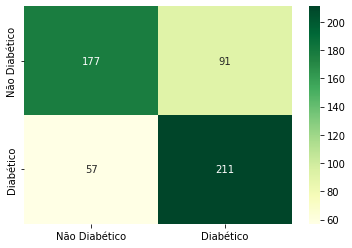

In [609]:
print_confusion_matrix(y_cc, predictions, xlabel=labels, color='YlGn')

(array([0.        , 0.        , 0.00373134, 0.02238806, 0.08955224,
       0.15298507, 0.22761194, 0.32089552, 0.40671642, 0.50373134,
       0.6119403 , 0.71641791, 0.84328358, 0.9738806 , 1.        ]), array([0.        , 0.00746269, 0.08208955, 0.22014925, 0.42910448,
       0.57089552, 0.70522388, 0.78731343, 0.85074627, 0.90671642,
       0.94402985, 0.97014925, 0.98880597, 1.        , 1.        ]), array([2.        , 1.        , 0.92307692, 0.84615385, 0.76923077,
       0.69230769, 0.61538462, 0.53846154, 0.46153846, 0.38461538,
       0.30769231, 0.23076923, 0.15384615, 0.07692308, 0.        ]))


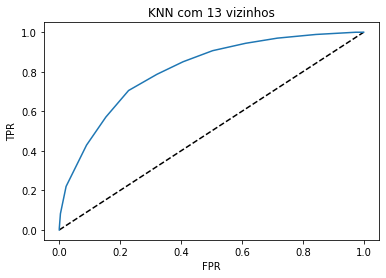

Área sob a curva: 0.8096527623078638


In [610]:
print_roc_curve(grid,X_cc,y_cc,'KNN', 'KNN com 13 vizinhos')

In [611]:
set_classification_report(results_knn, y_cc, predictions, 2)
results_knn.style.highlight_max().set_properties(**{'padding': '5px'})

,Balanceamento,Acurácia,Recall,Precisão,F-Measure
0,Original,0.760417,0.544776,0.701923,0.613445
1,SMOTE,0.798000,0.892000,0.750842,0.815356
2,ClusterCentroids,0.723881,0.787313,0.698675,0.740351


## Naive Bayes

Para o último classificador, serão testados os modelos Gaussiano, Bernoulli e Multinominal do algoritmo Naive Bayes

## Gaussian NB

In [612]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB

In [613]:
# Dataset para armazenar os resultados

x_results = ['Balanceamento', 'Acurácia', 'Recall', 'Precisão', 'F-Measure']
y_results = ['Original', 'SMOTE', 'ClusterCentroids']

results_nb = pd.DataFrame(columns=x_results)

results_nb.reindex()
results_nb['Balanceamento'] = y_results

### Sem Balanceamento

In [614]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gnb = GaussianNB()
grid = GridSearchCV(gnb, params_NB, cv=10)
grid.fit(X,y)

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [615]:
gnb = grid.best_estimator_

predictions = cross_val_predict(gnb, X, y, cv=10)

print(f'Melhor modelo para GaussianNB sem balanceamento: {grid.best_estimator_}')
print(f'Acurâcia obtida com o melhor modelo: {accuracy_score(y, predictions)*100}%')

Melhor modelo para GaussianNB sem balanceamento: GaussianNB(var_smoothing=4.328761281083053e-06)
Acurâcia obtida com o melhor modelo: 76.30208333333334%


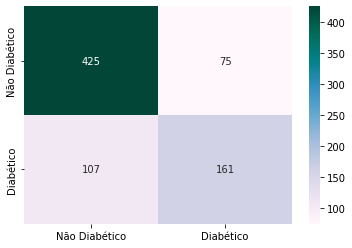

In [616]:
print_confusion_matrix(y, predictions=predictions, xlabel=labels, color='PuBuGn')

(array([0.   , 0.002, 0.002, 0.004, 0.004, 0.006, 0.006, 0.008, 0.008,
       0.01 , 0.01 , 0.012, 0.012, 0.014, 0.014, 0.016, 0.016, 0.018,
       0.018, 0.02 , 0.02 , 0.022, 0.022, 0.024, 0.024, 0.026, 0.026,
       0.028, 0.028, 0.03 , 0.03 , 0.032, 0.032, 0.034, 0.034, 0.036,
       0.036, 0.038, 0.038, 0.042, 0.042, 0.044, 0.044, 0.048, 0.048,
       0.05 , 0.05 , 0.052, 0.052, 0.054, 0.054, 0.056, 0.056, 0.058,
       0.058, 0.06 , 0.06 , 0.062, 0.062, 0.066, 0.066, 0.068, 0.068,
       0.07 , 0.07 , 0.076, 0.076, 0.082, 0.082, 0.084, 0.084, 0.086,
       0.086, 0.088, 0.088, 0.09 , 0.09 , 0.092, 0.092, 0.094, 0.094,
       0.102, 0.102, 0.104, 0.104, 0.108, 0.108, 0.112, 0.112, 0.116,
       0.116, 0.12 , 0.12 , 0.13 , 0.13 , 0.132, 0.132, 0.134, 0.134,
       0.136, 0.136, 0.142, 0.142, 0.144, 0.144, 0.146, 0.146, 0.15 ,
       0.15 , 0.164, 0.164, 0.168, 0.168, 0.184, 0.184, 0.186, 0.186,
       0.19 , 0.19 , 0.192, 0.192, 0.194, 0.194, 0.2  , 0.2  , 0.204,
       0.204, 0.206

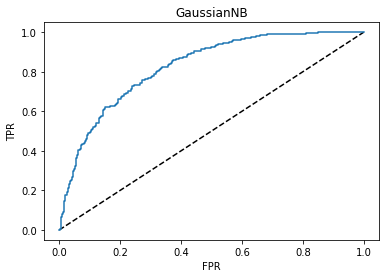

Área sob a curva: 0.8251119402985075


In [617]:
print_roc_curve(grid,X,y,'GaussianNB','GaussianNB')

In [618]:
set_classification_report(results_nb,y,predictions,0)

### Balanceamento com SMOTE

In [619]:
gnb = GaussianNB()
grid = GridSearchCV(gnb, params_NB, cv=10)
grid.fit(X_smote,y_smote)

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [620]:
gnb = grid.best_estimator_

predictions = cross_val_predict(gnb, X_smote, y_smote, cv=10)

print(f'Melhor modelo para GaussianNB com balanceamento SMOTE: {grid.best_estimator_}')
print(f'Acurâcia obtida com o melhor modelo: {accuracy_score(y_smote, predictions)*100}%')

Melhor modelo para GaussianNB com balanceamento SMOTE: GaussianNB(var_smoothing=4.328761281083062e-05)
Acurâcia obtida com o melhor modelo: 74.0%


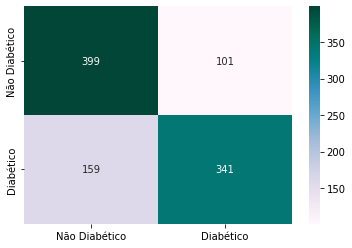

In [621]:
print_confusion_matrix(y_smote, predictions=predictions, xlabel=labels, color='PuBuGn')

(array([0.   , 0.   , 0.004, 0.004, 0.006, 0.006, 0.008, 0.008, 0.01 ,
       0.01 , 0.012, 0.012, 0.014, 0.014, 0.016, 0.016, 0.018, 0.018,
       0.02 , 0.02 , 0.022, 0.022, 0.024, 0.024, 0.026, 0.026, 0.028,
       0.028, 0.03 , 0.03 , 0.032, 0.032, 0.036, 0.036, 0.038, 0.038,
       0.04 , 0.04 , 0.042, 0.042, 0.044, 0.044, 0.048, 0.048, 0.05 ,
       0.05 , 0.054, 0.054, 0.056, 0.056, 0.058, 0.058, 0.06 , 0.06 ,
       0.062, 0.062, 0.064, 0.064, 0.066, 0.066, 0.068, 0.068, 0.07 ,
       0.07 , 0.074, 0.074, 0.076, 0.076, 0.078, 0.078, 0.082, 0.082,
       0.086, 0.086, 0.088, 0.088, 0.092, 0.092, 0.1  , 0.1  , 0.102,
       0.102, 0.104, 0.104, 0.106, 0.106, 0.11 , 0.11 , 0.112, 0.112,
       0.114, 0.114, 0.116, 0.116, 0.118, 0.118, 0.122, 0.122, 0.124,
       0.124, 0.126, 0.126, 0.132, 0.132, 0.134, 0.134, 0.138, 0.138,
       0.14 , 0.14 , 0.142, 0.142, 0.15 , 0.15 , 0.156, 0.156, 0.158,
       0.158, 0.16 , 0.16 , 0.162, 0.162, 0.164, 0.164, 0.166, 0.166,
       0.17 , 0.17 

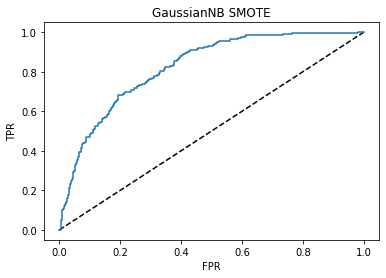

Área sob a curva: 0.8231560000000001


In [622]:
print_roc_curve(grid, X_smote, y_smote, 'GaussianNB', 'GaussianNB SMOTE')

In [623]:
set_classification_report(results_nb,y_smote,predictions,1)

### Balanceamento com CC

In [624]:
gnb = GaussianNB()
grid = GridSearchCV(gnb, params_NB, cv=10)
grid.fit(X_cc,y_cc)

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [625]:
knn = grid.best_estimator_

predictions = cross_val_predict(knn, X_cc, y_cc, cv=10)

print(f'Melhor modelo para GaussianNB com balanceamento por CC: {grid.best_estimator_}')
print(f'Acurâcia obtida com o melhor modelo: {accuracy_score(y_cc, predictions)*100}%')

Melhor modelo para GaussianNB com balanceamento por CC: GaussianNB(var_smoothing=4.328761281083053e-06)
Acurâcia obtida com o melhor modelo: 70.33582089552239%


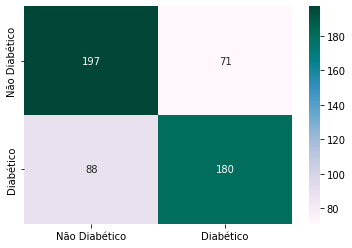

In [626]:
print_confusion_matrix(y_cc, predictions, xlabel=labels, color='PuBuGn')

(array([0.   , 0.002, 0.002, 0.004, 0.004, 0.006, 0.006, 0.008, 0.008,
       0.014, 0.014, 0.016, 0.016, 0.018, 0.018, 0.02 , 0.02 , 0.022,
       0.022, 0.024, 0.024, 0.026, 0.026, 0.028, 0.028, 0.03 , 0.03 ,
       0.034, 0.034, 0.036, 0.036, 0.038, 0.038, 0.04 , 0.04 , 0.044,
       0.044, 0.046, 0.046, 0.048, 0.048, 0.05 , 0.05 , 0.052, 0.052,
       0.054, 0.054, 0.056, 0.056, 0.058, 0.058, 0.06 , 0.06 , 0.066,
       0.066, 0.068, 0.068, 0.07 , 0.07 , 0.072, 0.072, 0.074, 0.074,
       0.076, 0.076, 0.078, 0.078, 0.08 , 0.08 , 0.082, 0.082, 0.084,
       0.084, 0.086, 0.086, 0.094, 0.094, 0.096, 0.096, 0.098, 0.098,
       0.1  , 0.1  , 0.102, 0.102, 0.104, 0.104, 0.106, 0.106, 0.11 ,
       0.11 , 0.112, 0.112, 0.114, 0.114, 0.116, 0.116, 0.118, 0.118,
       0.122, 0.122, 0.124, 0.124, 0.126, 0.126, 0.13 , 0.13 , 0.132,
       0.132, 0.134, 0.134, 0.136, 0.136, 0.138, 0.138, 0.14 , 0.14 ,
       0.144, 0.144, 0.146, 0.146, 0.148, 0.148, 0.152, 0.152, 0.154,
       0.154, 0.156

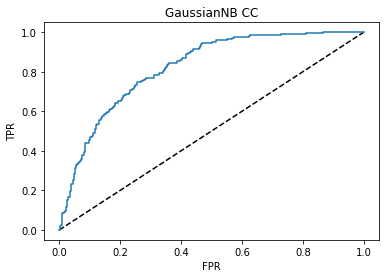

Área sob a curva: 0.8218399999999999


In [627]:
print_roc_curve(grid,X_smote,y_smote,'GaussianNB', 'GaussianNB CC')

In [628]:
set_classification_report(results_nb, y_cc, predictions, 2)
results_nb.style.highlight_max().set_properties(**{'padding': '5px'})

,Balanceamento,Acurácia,Recall,Precisão,F-Measure
0,Original,0.763021,0.600746,0.682203,0.638889
1,SMOTE,0.740000,0.682000,0.771493,0.723992
2,ClusterCentroids,0.703358,0.671642,0.717131,0.693642


## Bernoulli

In [629]:
# Dataset para armazenar os resultados

x_results = ['Balanceamento', 'Acurácia', 'Recall', 'Precisão', 'F-Measure']
y_results = ['Original', 'SMOTE', 'ClusterCentroids']

results_ber = pd.DataFrame(columns=x_results)

results_ber.reindex()
results_ber['Balanceamento'] = y_results

### Sem Balanceamento

In [630]:
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}

bnb = BernoulliNB()
grid = GridSearchCV(bnb, params, cv=10)
grid.fit(X,y)

GridSearchCV(cv=10, estimator=BernoulliNB(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]})

In [631]:
bnb = grid.best_estimator_

predictions = cross_val_predict(bnb, X, y, cv=10)

print(f'Melhor modelo para BernoulliNB sem balanceamento: {grid.best_estimator_}')
print(f'Acurâcia obtida com o melhor modelo: {accuracy_score(y, predictions)*100}%')

Melhor modelo para BernoulliNB sem balanceamento: BernoulliNB(alpha=0.01)
Acurâcia obtida com o melhor modelo: 64.453125%


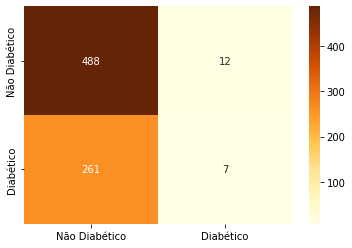

In [632]:
print_confusion_matrix(y, predictions, labels, color='YlOrBr')

(array([0.   , 0.018, 0.024, 0.026, 0.232, 0.236, 0.27 , 0.272, 0.432,
       0.458, 0.908, 0.918, 0.992, 0.994, 0.996, 1.   ]), array([0.        , 0.02985075, 0.05223881, 0.05597015, 0.30597015,
       0.31343284, 0.33208955, 0.33208955, 0.47761194, 0.50746269,
       0.92164179, 0.92537313, 0.99626866, 0.99626866, 1.        ,
       1.        ]), array([1.52392587, 0.52392587, 0.51542364, 0.46430553, 0.4063944 ,
       0.40217327, 0.39820414, 0.36164176, 0.35030727, 0.34259499,
       0.31227251, 0.31184816, 0.30500449, 0.30458563, 0.21991517,
       0.15305367]))


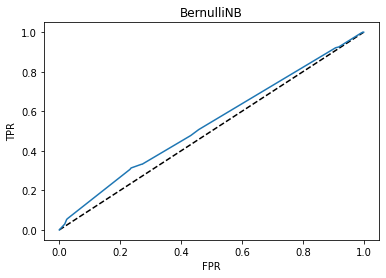

Área sob a curva: 0.5382350746268657


In [633]:
print_roc_curve(grid, X, y, 'BernulliNB', 'BernulliNB')

In [634]:
set_classification_report(results_ber, y, predictions, 0)

### Balanceamento com SMOTE

In [635]:
bnb = BernoulliNB()
grid = GridSearchCV(bnb, params, cv=10)
grid.fit(X_smote,y_smote)

GridSearchCV(cv=10, estimator=BernoulliNB(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]})

In [636]:
bnb = grid.best_estimator_

predictions = cross_val_predict(bnb, X_smote, y_smote, cv=10)

print(f'Melhor modelo para BernulliNB com balanceamento SMOTE: {grid.best_estimator_}')
print(f'Acurâcia obtida com o melhor modelo: {accuracy_score(y_smote, predictions)*100}%')

Melhor modelo para BernulliNB com balanceamento SMOTE: BernoulliNB(alpha=0.01)
Acurâcia obtida com o melhor modelo: 51.4%


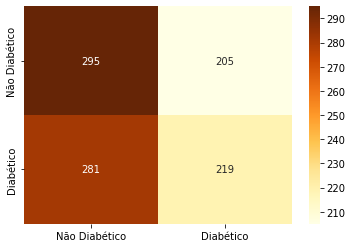

In [637]:
print_confusion_matrix(y_smote, predictions, labels, color='YlOrBr')

(array([0.   , 0.018, 0.024, 0.026, 0.232, 0.266, 0.426, 0.452, 0.902,
       0.976, 0.98 , 0.982, 0.992, 0.994, 0.996, 1.   ]), array([0.   , 0.026, 0.054, 0.062, 0.3  , 0.316, 0.468, 0.496, 0.93 ,
       0.992, 0.996, 0.996, 0.998, 0.998, 1.   , 1.   ]), array([1.67528152, 0.67528152, 0.65304776, 0.63843128, 0.54579368,
       0.52098306, 0.50501991, 0.48010361, 0.47301819, 0.44825094,
       0.40474442, 0.37429201, 0.31384918, 0.29278568, 0.20904914,
       0.15160136]))


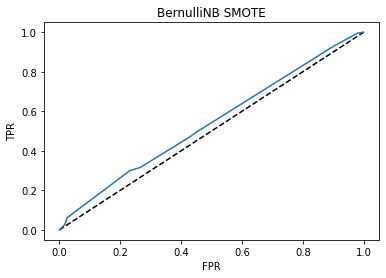

Área sob a curva: 0.5394960000000001


In [638]:
print_roc_curve(grid, X_smote, y_smote, 'BernulliNB', 'BernulliNB SMOTE')

In [639]:
set_classification_report(results_ber, y_smote, predictions, 1)

### Balanceamento com CC

In [640]:
bnb = BernoulliNB()
grid = GridSearchCV(bnb, params, cv=10)
grid.fit(X_cc,y_cc)

GridSearchCV(cv=10, estimator=BernoulliNB(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]})

In [641]:
bnb = grid.best_estimator_

predictions = cross_val_predict(bnb, X_cc, y_cc, cv=10)

print(f'Melhor modelo para BernulliNB com balanceamento CC: {grid.best_estimator_}')
print(f'Acurâcia obtida com o melhor modelo: {accuracy_score(y_cc, predictions)*100}%')

Melhor modelo para BernulliNB com balanceamento CC: BernoulliNB(alpha=10.0)
Acurâcia obtida com o melhor modelo: 57.276119402985074%


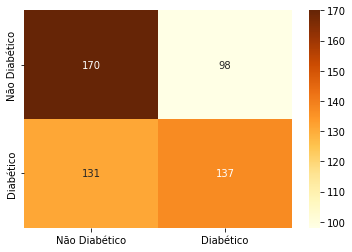

In [642]:
print_confusion_matrix(y_cc, predictions, labels, color='YlOrBr')

(array([0.        , 0.00373134, 0.01865672, 0.0261194 , 0.03731343,
       0.20149254, 0.20895522, 0.2238806 , 0.35447761, 0.3619403 ,
       0.36567164, 0.46641791, 0.99253731, 1.        ]), array([0.        , 0.02238806, 0.05223881, 0.05597015, 0.07462687,
       0.32462687, 0.33208955, 0.3619403 , 0.50746269, 0.51492537,
       0.51492537, 0.5858209 , 1.        , 1.        ]), array([1.75565399, 0.75565399, 0.75096898, 0.70468623, 0.67506768,
       0.6695133 , 0.6158362 , 0.54003117, 0.53376272, 0.5128932 ,
       0.48160718, 0.39988907, 0.39385444, 0.34524655]))


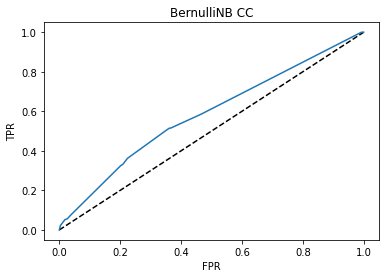

Área sob a curva: 0.5847209846290934


In [643]:
print_roc_curve(grid, X_cc, y_cc, 'BernulliNB', 'BernulliNB CC')

In [644]:
set_classification_report(results_ber, y_cc, predictions, 2)
results_ber.style.highlight_max().set_properties(**{'padding': '5px'})

,Balanceamento,Acurácia,Recall,Precisão,F-Measure
0,Original,0.644531,0.026119,0.368421,0.048780
1,SMOTE,0.514000,0.438000,0.516509,0.474026
2,ClusterCentroids,0.572761,0.511194,0.582979,0.544732


## MultinomialNB

In [645]:
x_results = ['Balanceamento', 'Acurácia', 'Recall', 'Precisão', 'F-Measure']
y_results = ['Original', 'SMOTE', 'ClusterCentroids']

results_mnb = pd.DataFrame(columns=x_results)

results_mnb.reindex()
results_mnb['Balanceamento'] = y_results

### Sem Balancemanto

In [646]:
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}

mnb = MultinomialNB()
grid = GridSearchCV(mnb, params, cv=10)
grid.fit(X,y)

GridSearchCV(cv=10, estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]})

In [647]:
mnb = grid.best_estimator_

predictions = cross_val_predict(mnb, X, y, cv=10)

print(f'Melhor modelo para MultinomialNB sem balanceamento: {grid.best_estimator_}')
print(f'Acurâcia obtida com o melhor modelo: {accuracy_score(y, predictions)*100}%')

Melhor modelo para MultinomialNB sem balanceamento: MultinomialNB(alpha=0.01)
Acurâcia obtida com o melhor modelo: 59.114583333333336%


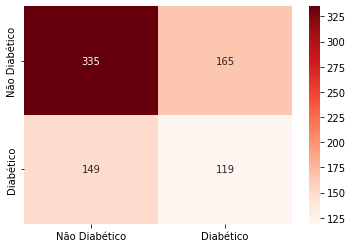

In [648]:
print_confusion_matrix(y, predictions, labels, color='Reds')

(array([0.   , 0.044, 0.044, 0.044, 0.044, 0.052, 0.052, 0.054, 0.054,
       0.056, 0.056, 0.06 , 0.06 , 0.064, 0.064, 0.068, 0.068, 0.07 ,
       0.07 , 0.072, 0.072, 0.08 , 0.08 , 0.088, 0.088, 0.09 , 0.09 ,
       0.094, 0.094, 0.096, 0.096, 0.098, 0.098, 0.1  , 0.1  , 0.106,
       0.106, 0.112, 0.112, 0.114, 0.114, 0.118, 0.118, 0.12 , 0.12 ,
       0.128, 0.128, 0.138, 0.138, 0.14 , 0.14 , 0.142, 0.142, 0.144,
       0.144, 0.152, 0.152, 0.154, 0.154, 0.156, 0.156, 0.16 , 0.16 ,
       0.162, 0.162, 0.164, 0.164, 0.172, 0.172, 0.182, 0.182, 0.186,
       0.186, 0.188, 0.188, 0.196, 0.196, 0.198, 0.198, 0.212, 0.212,
       0.216, 0.216, 0.218, 0.218, 0.22 , 0.22 , 0.222, 0.222, 0.226,
       0.226, 0.238, 0.238, 0.24 , 0.24 , 0.258, 0.258, 0.264, 0.264,
       0.274, 0.274, 0.28 , 0.28 , 0.284, 0.284, 0.288, 0.288, 0.298,
       0.298, 0.302, 0.302, 0.318, 0.318, 0.322, 0.322, 0.328, 0.328,
       0.33 , 0.33 , 0.336, 0.336, 0.346, 0.346, 0.372, 0.372, 0.38 ,
       0.38 , 0.384

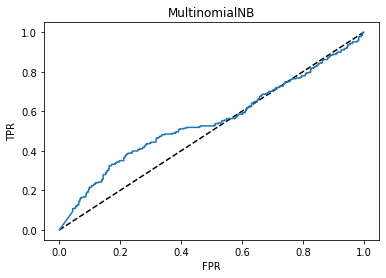

Área sob a curva: 0.5507014925373134


In [649]:
print_roc_curve(grid, X, y, 'MultinomialNB', 'MultinomialNB')

In [650]:
set_classification_report(results_mnb, y, predictions, 0)

### Balanceamento com SMOTE

In [651]:
mnb = MultinomialNB()
grid = GridSearchCV(mnb, params, cv=10)
grid.fit(X_smote,y_smote)

GridSearchCV(cv=10, estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]})

In [652]:
mnb = grid.best_estimator_

predictions = cross_val_predict(mnb, X_smote, y_smote, cv=10)

print(f'Melhor modelo para MultinomialNB com balanceamento SMOTE: {grid.best_estimator_}')
print(f'Acurâcia obtida com o melhor modelo: {accuracy_score(y_smote, predictions)*100}%')

Melhor modelo para MultinomialNB com balanceamento SMOTE: MultinomialNB(alpha=0.01)
Acurâcia obtida com o melhor modelo: 57.4%


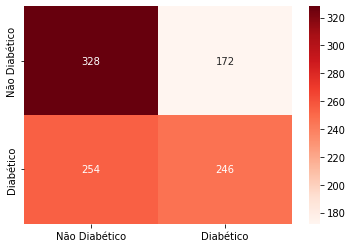

In [653]:
print_confusion_matrix(y_smote, predictions, labels, color='Reds')

(array([0.   , 0.044, 0.046, 0.048, 0.048, 0.052, 0.052, 0.054, 0.054,
       0.056, 0.056, 0.06 , 0.06 , 0.062, 0.062, 0.064, 0.064, 0.066,
       0.066, 0.068, 0.068, 0.07 , 0.07 , 0.072, 0.072, 0.078, 0.078,
       0.082, 0.082, 0.084, 0.084, 0.088, 0.088, 0.092, 0.092, 0.096,
       0.096, 0.1  , 0.1  , 0.102, 0.102, 0.106, 0.106, 0.11 , 0.11 ,
       0.114, 0.114, 0.124, 0.124, 0.128, 0.128, 0.136, 0.136, 0.138,
       0.138, 0.14 , 0.14 , 0.142, 0.142, 0.144, 0.144, 0.146, 0.146,
       0.148, 0.148, 0.15 , 0.15 , 0.152, 0.152, 0.156, 0.156, 0.158,
       0.158, 0.162, 0.162, 0.164, 0.164, 0.168, 0.168, 0.18 , 0.18 ,
       0.184, 0.184, 0.186, 0.186, 0.188, 0.188, 0.196, 0.196, 0.198,
       0.198, 0.206, 0.206, 0.208, 0.208, 0.212, 0.212, 0.214, 0.214,
       0.216, 0.216, 0.22 , 0.22 , 0.228, 0.228, 0.23 , 0.23 , 0.232,
       0.232, 0.234, 0.234, 0.24 , 0.24 , 0.242, 0.242, 0.25 , 0.25 ,
       0.254, 0.254, 0.26 , 0.26 , 0.264, 0.264, 0.268, 0.268, 0.272,
       0.272, 0.274

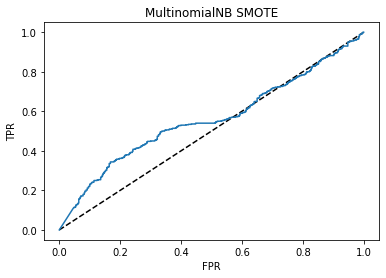

Área sob a curva: 0.559342


In [654]:
print_roc_curve(grid, X_smote, y_smote, 'MultinomialNB', 'MultinomialNB SMOTE')

In [655]:
set_classification_report(results_mnb, y_smote, predictions, 1)

### Balanceamento com CC

In [656]:
mnb = MultinomialNB()
grid = GridSearchCV(mnb, params, cv=10)
grid.fit(X_cc,y_cc)

GridSearchCV(cv=10, estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]})

In [657]:
mnb = grid.best_estimator_

predictions = cross_val_predict(mnb, X_cc, y_cc, cv=10)

print(f'Melhor modelo para MultinomialNB com balanceamento CC: {grid.best_estimator_}')
print(f'Acurâcia obtida com o melhor modelo: {accuracy_score(y_cc, predictions)*100}%')

Melhor modelo para MultinomialNB com balanceamento CC: MultinomialNB()
Acurâcia obtida com o melhor modelo: 57.649253731343286%


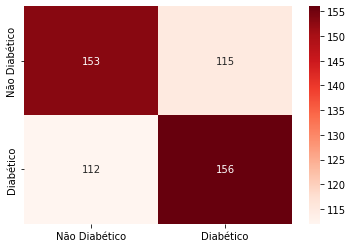

In [658]:
print_confusion_matrix(y_cc, predictions, labels, color='Reds')


(array([0.        , 0.        , 0.        , 0.00373134, 0.00373134,
       0.00746269, 0.00746269, 0.01119403, 0.01119403, 0.01492537,
       0.01492537, 0.01865672, 0.01865672, 0.02238806, 0.02238806,
       0.02985075, 0.02985075, 0.03358209, 0.03358209, 0.04104478,
       0.04104478, 0.04477612, 0.04477612, 0.04850746, 0.04850746,
       0.05223881, 0.05223881, 0.05597015, 0.05597015, 0.05970149,
       0.05970149, 0.06343284, 0.06343284, 0.06716418, 0.06716418,
       0.07089552, 0.07089552, 0.07462687, 0.07462687, 0.07835821,
       0.07835821, 0.0858209 , 0.0858209 , 0.09328358, 0.09328358,
       0.09701493, 0.09701493, 0.10074627, 0.10074627, 0.10447761,
       0.10447761, 0.10820896, 0.10820896, 0.1119403 , 0.1119403 ,
       0.11567164, 0.11567164, 0.11940299, 0.11940299, 0.13059701,
       0.13059701, 0.13432836, 0.13432836, 0.14552239, 0.14552239,
       0.14925373, 0.14925373, 0.15671642, 0.15671642, 0.16791045,
       0.16791045, 0.17164179, 0.17164179, 0.18656716, 0.1865

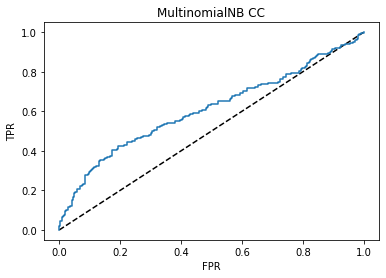

Área sob a curva: 0.6087937179772778


In [659]:
print_roc_curve(grid, X_cc, y_cc, 'MultinomialNB', 'MultinomialNB CC')

In [660]:
set_classification_report(results_mnb, y_cc, predictions, 2)
results_mnb.style.highlight_max().set_properties(**{'padding': '5px'})

,Balanceamento,Acurácia,Recall,Precisão,F-Measure
0,Original,0.591146,0.444030,0.419014,0.431159
1,SMOTE,0.574000,0.492000,0.588517,0.535948
2,ClusterCentroids,0.576493,0.582090,0.575646,0.578850
